In [714]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

In [715]:
pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок
stud_math = pd.read_csv('C:/Users/PC/Downloads/stud_math.csv')

In [716]:
# Функция для получения уникальных значений
def get_unique_and_value_counts(df, col):
    print(col)
    print(df[col].unique())
    print(f'Количество уникальных значений: {df[col].nunique()}')
    print(df[col].value_counts())

In [717]:
# Функция постройки гистограммы
def hist_describe(df, col):
    print(col)
    print(df[col].hist())
    print(df[col].describe())

In [718]:
# Функция вычисления медианного значения
def score_median(df, col):
    for i in df[col].unique():
        stud_col_meadian = df[(df[col] == i)].score.median()
        stud_col_meadian = df[(df[col] == i)].score.median()
        print(f'Медиана {i}: {stud_col_meadian}')

In [719]:
# Функция рисования boxplot
def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=column, y='score', 
                data=stud_math.loc[stud_math.loc[:, column].isin(stud_math.loc[:, column].value_counts().index)],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

In [720]:
# Функция поиска статистической ошибки
def get_stat_dif(column):
    cols = stud_math.loc[:, column].value_counts().index
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud_math.loc[stud_math.loc[:, column] == comb[0], 'score'],
                        stud_math.loc[stud_math.loc[:, column] == comb[1], 'score'], nan_policy='omit').pvalue \
            <= 0.075/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [721]:
# Функция вычисления 25,75 процентиля, межквартильного расстояния и границы выбросов
def emissions(df, col):
    IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
    perc25 = df[col].quantile(0.25)
    perc75 = df[col].quantile(0.75)
    print(f'{col}:', f'25-й перцентиль: {perc25},', f'75-й перцентиль: {perc75}', 
                f"IQR: {IQR}", "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

In [722]:
#def get_unique_and_value_counts(df):
    #for col in list(df.columns):
        #print(col)
        #print(df[col].unique())
        #print(df[col].value_counts())
        #print()

In [723]:
display(stud_math.head(5))
stud_math.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [724]:
# Смотрит пропуски в процентном соотношении
pd.DataFrame(stud_math.isnull().mean() * 100)

,0
school,0.000000
sex,0.000000
age,0.000000
address,4.303797
famsize,6.835443
Pstatus,11.392405
Medu,0.759494
Fedu,6.075949
Mjob,4.810127
Fjob,9.113924


Пропусков не так много, как могло бы быть

# Посмотрим на распределение признака для числовых переменных, и если есть выбросы, устраним их.

age
AxesSubplot(0.125,0.125;0.775x0.755)
count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64


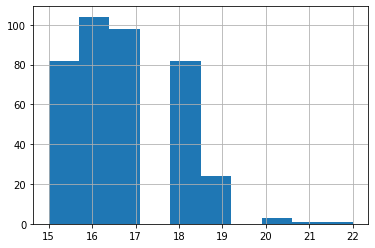

In [725]:
hist_describe(stud_math, 'age')

У данного признака распределение без аномалий, выбросов нет

Fedu
AxesSubplot(0.125,0.125;0.775x0.755)
count    371.000000
mean       2.614555
std        2.228732
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max       40.000000
Name: Fedu, dtype: float64


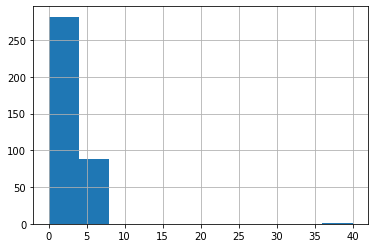

In [726]:
hist_describe(stud_math, 'Fedu')

Видим, что присутствует выброс в виде числа '40', будем считать что случайно дописали '0

In [727]:
stud_math.Fedu.unique()

array([ 4.,  1.,  2.,  3., 40., nan,  0.])

In [728]:
# Уберем выброс
stud_math.Fedu = stud_math.Fedu.apply(lambda x: x if x >= 0 and x <= 4 else x/10)

Fedu
AxesSubplot(0.125,0.125;0.775x0.755)
count    371.000000
mean       2.517520
std        1.088808
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: Fedu, dtype: float64


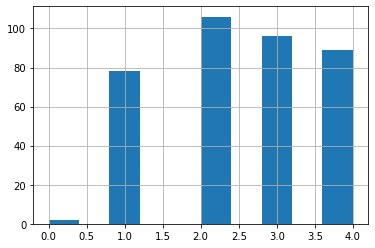

In [729]:
hist_describe(stud_math, 'Fedu')

traveltime
AxesSubplot(0.125,0.125;0.775x0.755)
count    367.000000
mean       1.438692
std        0.694181
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64


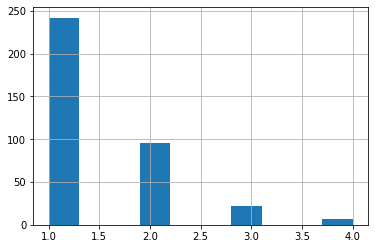

In [730]:
hist_describe(stud_math, 'traveltime')

У данного признака распределение без аномалий, выбросов нет

studytime
AxesSubplot(0.125,0.125;0.775x0.755)
count    388.000000
mean       2.038660
std        0.842078
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64


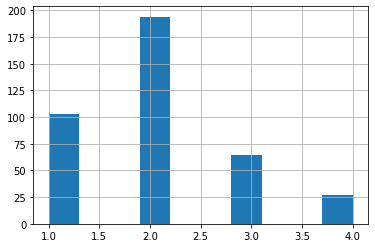

In [731]:
hist_describe(stud_math, 'studytime')

У данного признака распределение без аномалий, выбросов нет

studytime, granular
AxesSubplot(0.125,0.125;0.775x0.755)
count    388.000000
mean      -6.115979
std        2.526235
min      -12.000000
25%       -6.000000
50%       -6.000000
75%       -3.000000
max       -3.000000
Name: studytime, granular, dtype: float64


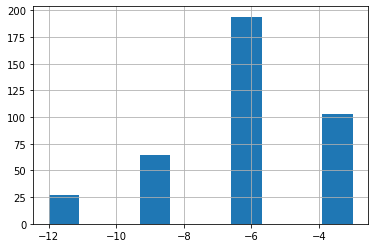

In [732]:
hist_describe(stud_math, 'studytime, granular')

У данного признака распределение без аномалий, выбросов нет

In [733]:
stud_math[['studytime, granular', 'studytime']].corr()

,"studytime, granular",studytime
"studytime, granular",1.0,-1.0
studytime,-1.0,1.0


In [734]:
stud_math.groupby(['studytime, granular', 'studytime']).score.median()

studytime, granular  studytime
-12.0                4.0          60.0
-9.0                 3.0          60.0
-6.0                 2.0          55.0
-3.0                 1.0          50.0
Name: score, dtype: float64

'studytime' и 'studytime, granular' скорелированны полностью отрицательно. 
'studytime, granular' - это 'studytime', домноженное на -3

In [735]:
stud_math.drop(['studytime, granular'], inplace=True, axis=1)

failures
AxesSubplot(0.125,0.125;0.775x0.755)
count    373.000000
mean       0.337802
std        0.743135
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64


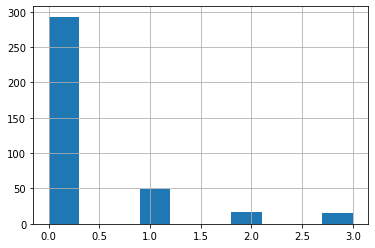

In [736]:
hist_describe(stud_math, 'failures')

У данного признака распределение без аномалий, выбросов нет

famrel
AxesSubplot(0.125,0.125;0.775x0.755)
count    368.000000
mean       3.937500
std        0.927277
min       -1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64


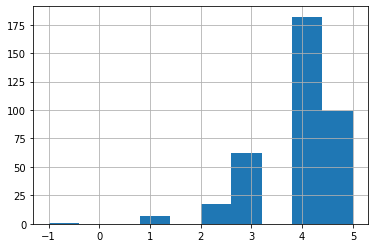

In [737]:
hist_describe(stud_math, 'famrel')

In [738]:
stud_math.famrel.unique()

array([ 4.,  5.,  3., nan, -1.,  2.,  1.])

In [739]:
# Уберем выброс
stud_math.famrel = stud_math.famrel.apply(lambda x: x if x >= 1 and x <= 5 else x / -1)

In [740]:
stud_math.famrel.unique()

array([ 4.,  5.,  3., nan,  1.,  2.])

famrel
AxesSubplot(0.125,0.125;0.775x0.755)
count    368.000000
mean       3.942935
std        0.903824
min        1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64


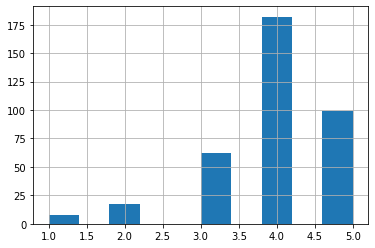

In [741]:
hist_describe(stud_math, 'famrel')

freetime
AxesSubplot(0.125,0.125;0.775x0.755)
count    384.000000
mean       3.231771
std        0.993940
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64


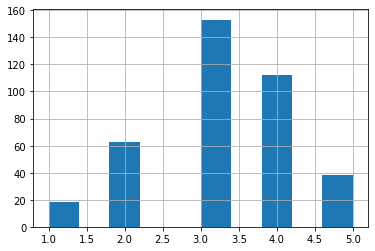

In [742]:
hist_describe(stud_math, 'freetime')

У данного признака распределение без аномалий, выбросов нет

goout
AxesSubplot(0.125,0.125;0.775x0.755)
count    387.000000
mean       3.105943
std        1.115896
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64


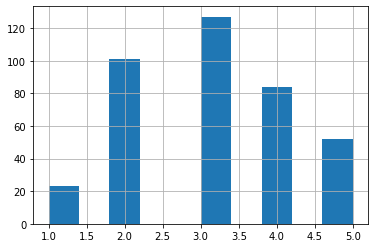

In [743]:
hist_describe(stud_math, 'goout')

У данного признака распределение без аномалий, выбросов нет

health
AxesSubplot(0.125,0.125;0.775x0.755)
count    380.000000
mean       3.531579
std        1.396019
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64


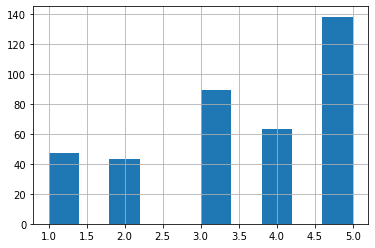

In [744]:
hist_describe(stud_math, 'health')

У данного признака распределение без аномалий, выбросов нет

absences
AxesSubplot(0.125,0.125;0.775x0.755)
count    383.000000
mean       7.279373
std       23.465197
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64


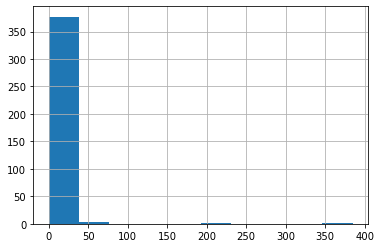

In [745]:
hist_describe(stud_math, 'absences')

У некоторых учеников слишком много пропусков, уберем всё свыше 100

In [746]:
emissions(stud_math, 'absences')

absences: 25-й перцентиль: 0.0, 75-й перцентиль: 8.0 IQR: 8.0 Границы выбросов: [-12.0, 20.0].


In [747]:
stud_math.absences = stud_math.absences.apply(lambda x: x if x >= 0 and x <= 100 else None)

absences
AxesSubplot(0.125,0.125;0.775x0.755)
count    381.000000
mean       5.750656
std        8.088542
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max       75.000000
Name: absences, dtype: float64


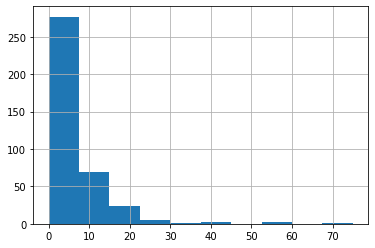

In [748]:
hist_describe(stud_math, 'absences')

score
AxesSubplot(0.125,0.125;0.775x0.755)
count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64


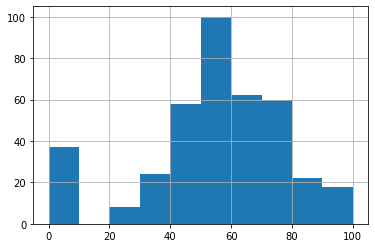

In [749]:
hist_describe(stud_math, 'score')

In [750]:
stud_math.score.unique()

array([ 30.,  50.,  75.,  55.,  95.,  45.,  60.,  70.,  80.,  25.,  40.,
        85.,  90.,  65., 100.,  35.,   0.,  nan,  20.])

Получить 0 баллов маловероятно, так что будем рассматривать их как выброс

In [751]:
stud_math.score = stud_math.score.apply(lambda x: x if x >= 20 else None)

score
AxesSubplot(0.125,0.125;0.775x0.755)
count    352.000000
mean      57.755682
std       16.200928
min       20.000000
25%       45.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64


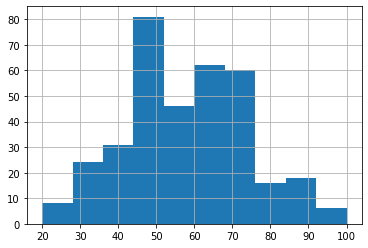

In [752]:
hist_describe(stud_math, 'score')

# Оценим количество уникальных значений для номинативных переменных

In [753]:
get_unique_and_value_counts(stud_math, 'sex')

sex
['F' 'M']
Количество уникальных значений: 2
F    208
M    187
Name: sex, dtype: int64


In [754]:
get_unique_and_value_counts(stud_math, 'address')

address
['U' nan 'R']
Количество уникальных значений: 2
U    295
R     83
Name: address, dtype: int64


In [755]:
get_unique_and_value_counts(stud_math, 'famsize')

famsize
[nan 'GT3' 'LE3']
Количество уникальных значений: 2
GT3    261
LE3    107
Name: famsize, dtype: int64


In [756]:
get_unique_and_value_counts(stud_math, 'Pstatus')

Pstatus
['A' nan 'T']
Количество уникальных значений: 2
T    314
A     36
Name: Pstatus, dtype: int64


In [757]:
get_unique_and_value_counts(stud_math, 'Mjob')

Mjob
['at_home' 'health' 'other' 'services' 'teacher' nan]
Количество уникальных значений: 5
other       133
services     98
at_home      58
teacher      55
health       32
Name: Mjob, dtype: int64


In [758]:
get_unique_and_value_counts(stud_math, 'Fjob')

Fjob
['teacher' 'other' nan 'health' 'services' 'at_home']
Количество уникальных значений: 5
other       197
services    102
teacher      29
at_home      16
health       15
Name: Fjob, dtype: int64


In [759]:
get_unique_and_value_counts(stud_math, 'reason')

reason
['course' 'other' 'home' 'reputation' nan]
Количество уникальных значений: 4
course        137
home          104
reputation    103
other          34
Name: reason, dtype: int64


In [760]:
get_unique_and_value_counts(stud_math, 'guardian')

guardian
['mother' 'father' 'other' nan]
Количество уникальных значений: 3
mother    250
father     86
other      28
Name: guardian, dtype: int64


In [761]:
get_unique_and_value_counts(stud_math, 'schoolsup')

schoolsup
['yes' 'no' nan]
Количество уникальных значений: 2
no     335
yes     51
Name: schoolsup, dtype: int64


In [762]:
get_unique_and_value_counts(stud_math, 'famsup')

famsup
['no' 'yes' nan]
Количество уникальных значений: 2
yes    219
no     137
Name: famsup, dtype: int64


In [763]:
get_unique_and_value_counts(stud_math, 'paid')

paid
['no' nan 'yes']
Количество уникальных значений: 2
no     200
yes    155
Name: paid, dtype: int64


In [764]:
get_unique_and_value_counts(stud_math, 'activities')

activities
['no' 'yes' nan]
Количество уникальных значений: 2
yes    195
no     186
Name: activities, dtype: int64


In [765]:
get_unique_and_value_counts(stud_math, 'nursery')

nursery
['yes' 'no' nan]
Количество уникальных значений: 2
yes    300
no      79
Name: nursery, dtype: int64


In [766]:
get_unique_and_value_counts(stud_math, 'higher')

higher
['yes' nan 'no']
Количество уникальных значений: 2
yes    356
no      19
Name: higher, dtype: int64


In [767]:
get_unique_and_value_counts(stud_math, 'internet')

internet
[nan 'yes' 'no']
Количество уникальных значений: 2
yes    305
no      56
Name: internet, dtype: int64


In [768]:
get_unique_and_value_counts(stud_math, 'romantic')

romantic
['no' nan 'yes']
Количество уникальных значений: 2
no     240
yes    124
Name: romantic, dtype: int64


# Проведём корреляционный анализ количественных переменных

In [769]:
stud_math_corr = stud_math[['age', 'absences', 'score']]
stud_math_corr.corr()

,age,absences,score
age,1.000000,0.166773,-0.131542
absences,0.166773,1.000000,-0.214926
score,-0.131542,-0.214926,1.000000


Между переменными score и age, absences отрицательная корреляция. Это говорит о том, что при увелицении возраста или количества пропусков падает балл за экзамен, между age и absences положительная, то есть при увеличении возраста уников растет количество пропусков

<AxesSubplot:>

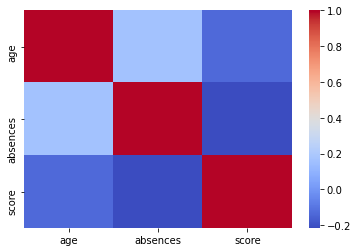

In [770]:
sns.heatmap(stud_math_corr.corr(), cmap='coolwarm')

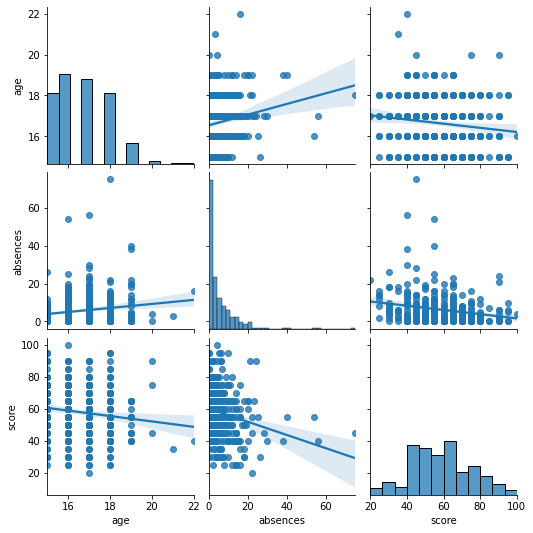

In [771]:
sns.pairplot(stud_math_corr, kind='reg')

# Проанализируем номинативные переменные

In [772]:
# Создадим отдельный DataFrame для оценки номинативных переменных
stud_math_nom = stud_math.copy()
stud_math_nom.drop(['age', 'absences', 'score'], inplace=True, axis=1)

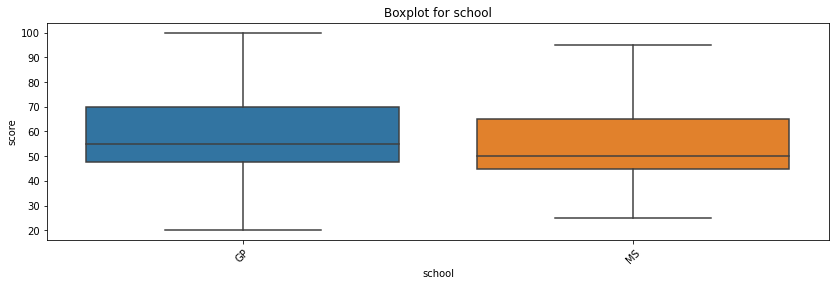

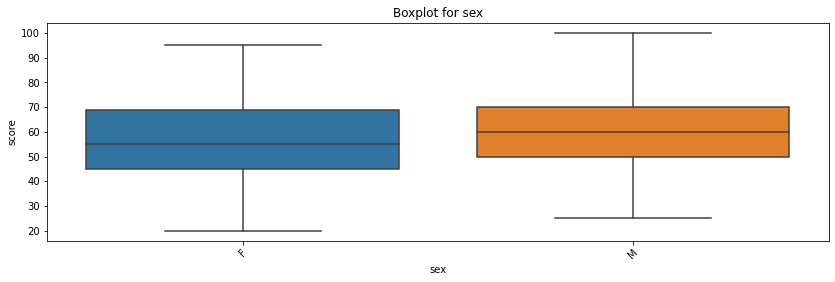

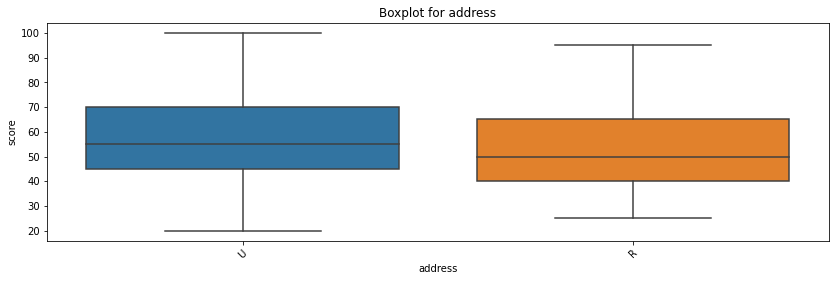

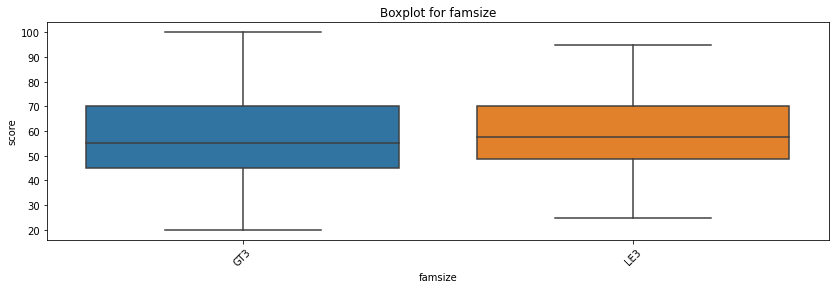

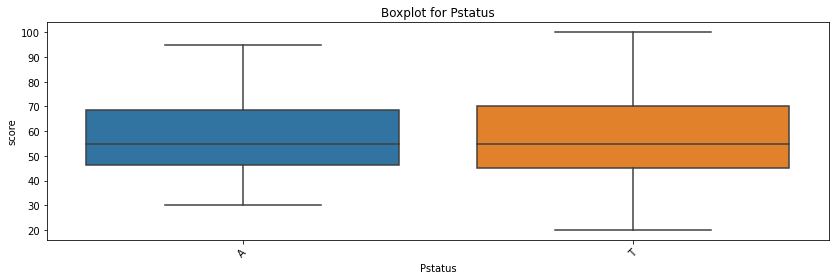

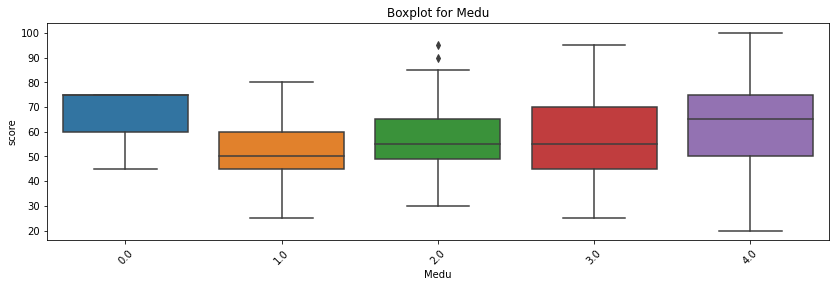

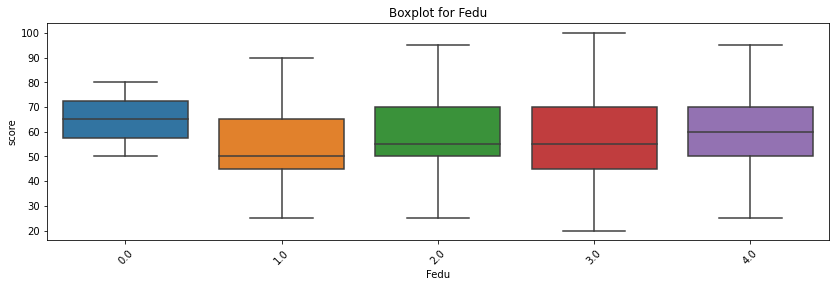

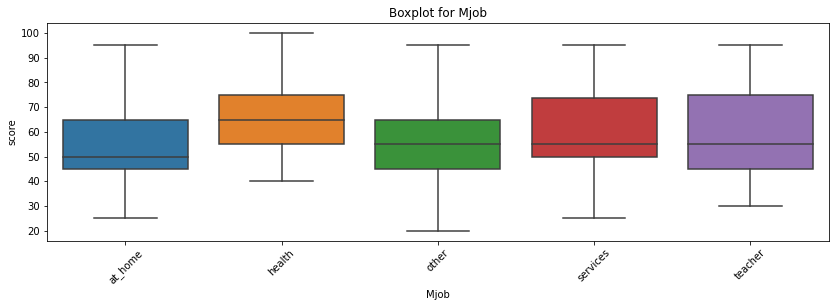

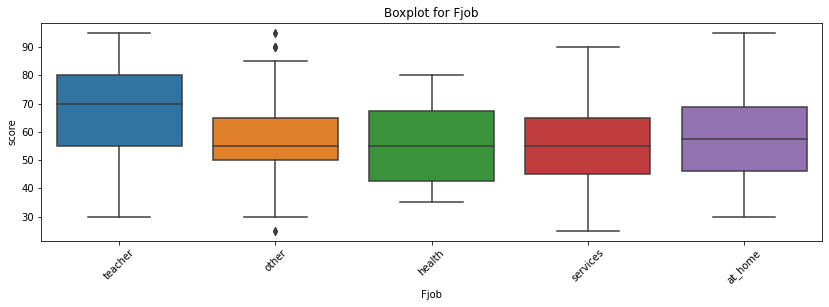

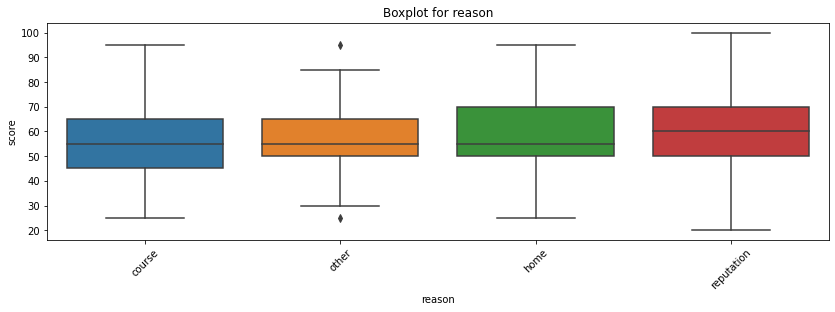

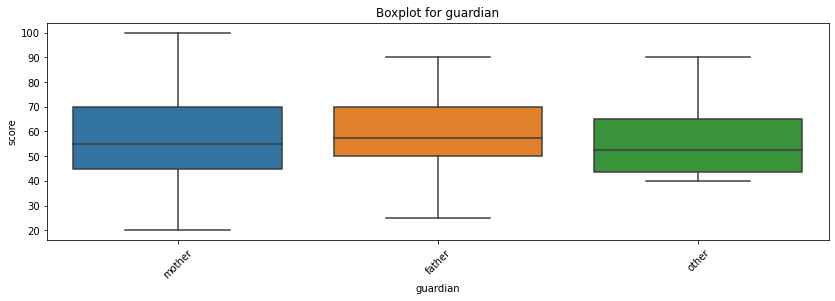

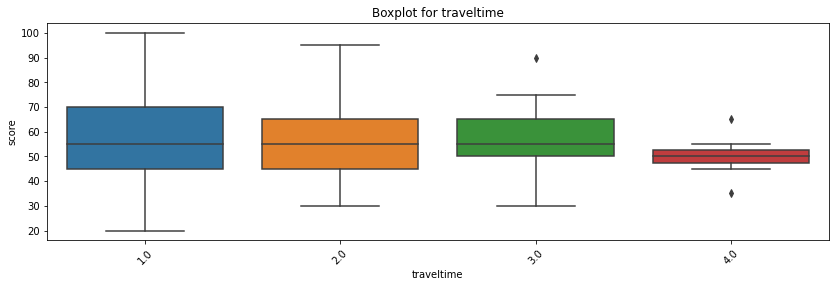

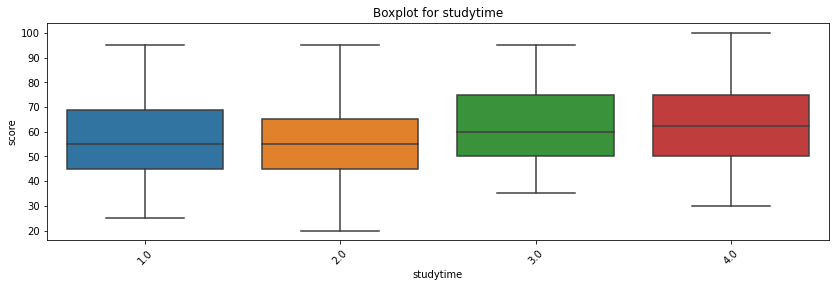

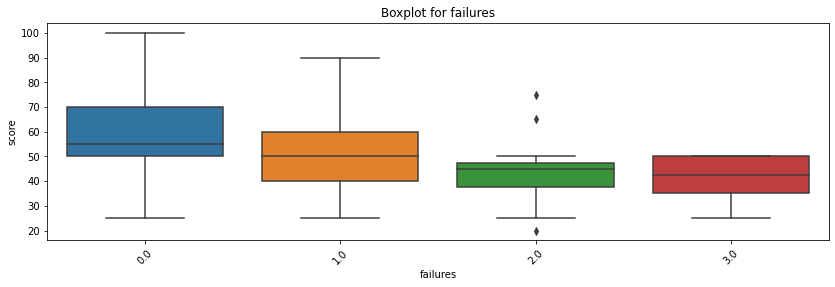

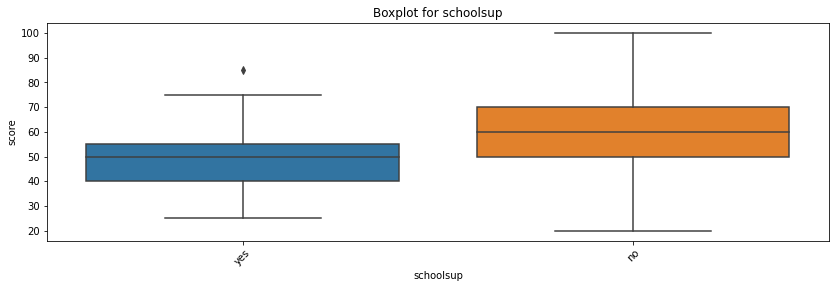

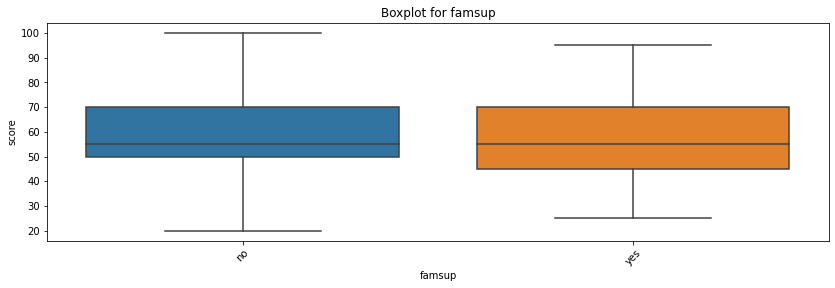

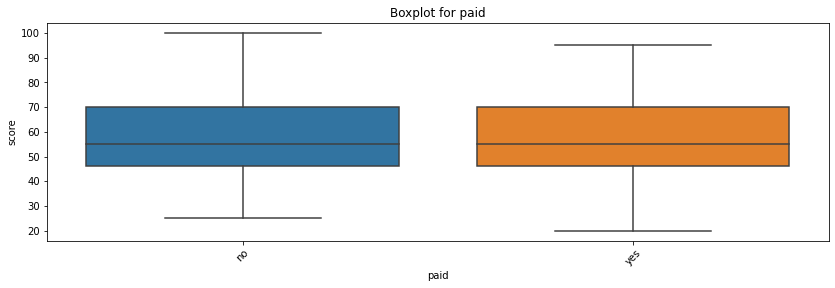

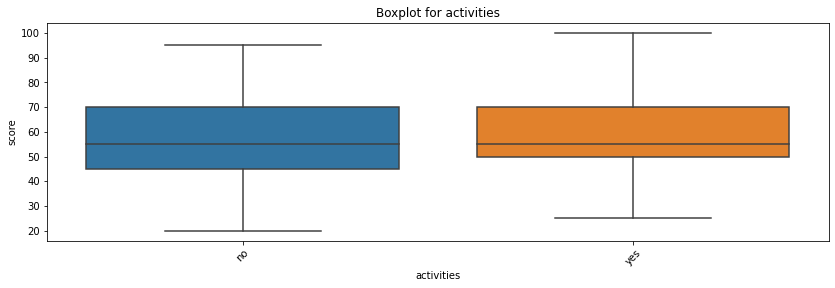

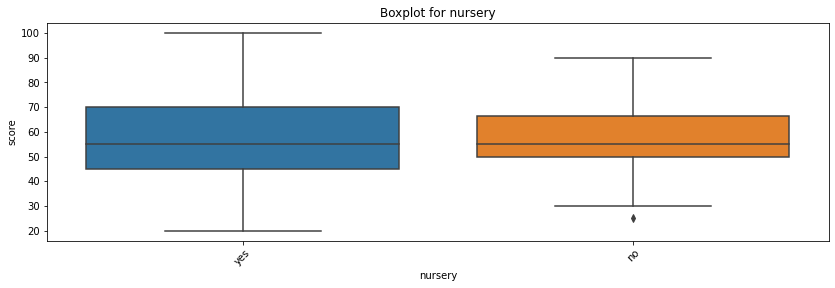

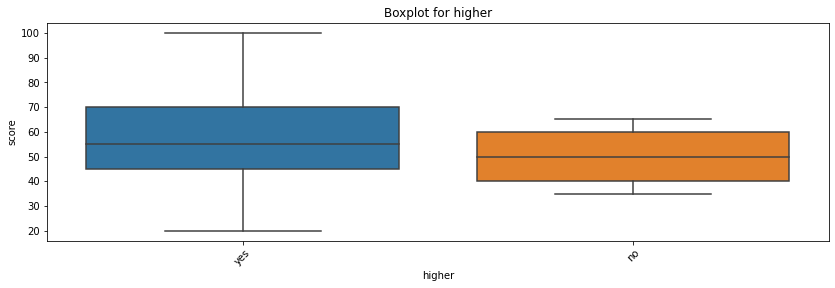

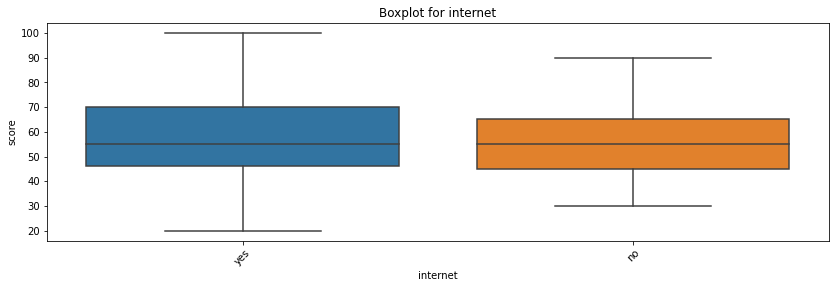

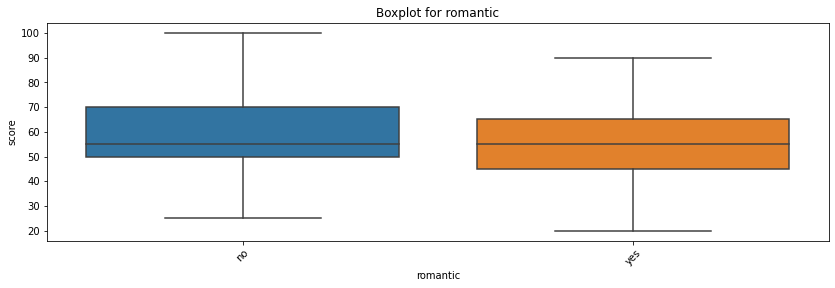

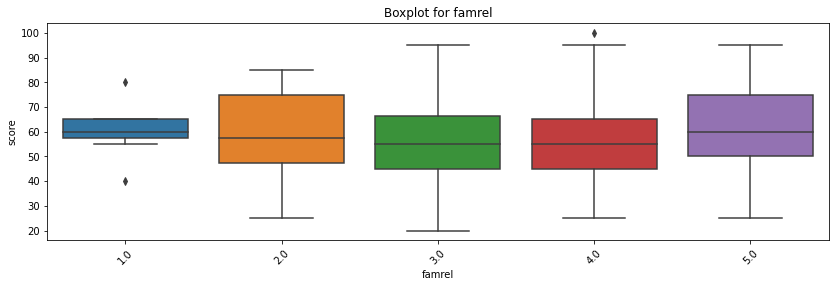

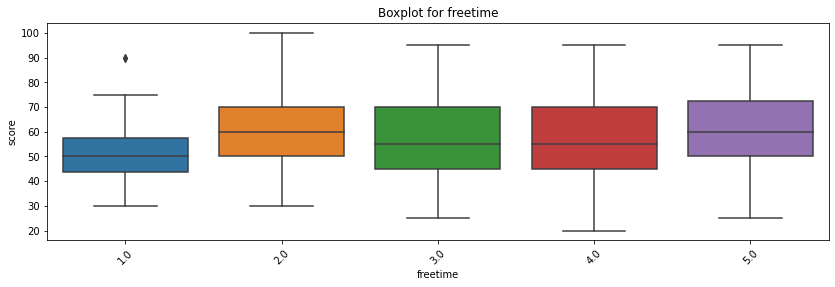

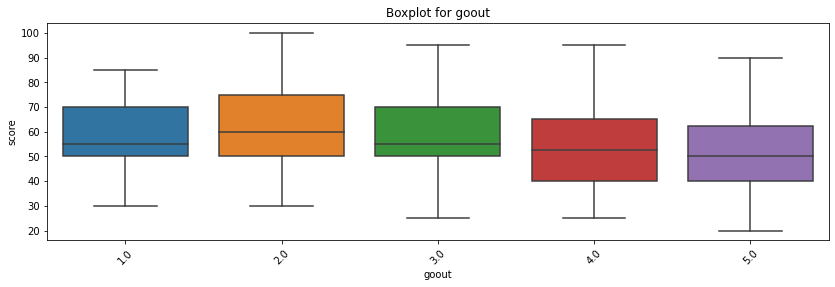

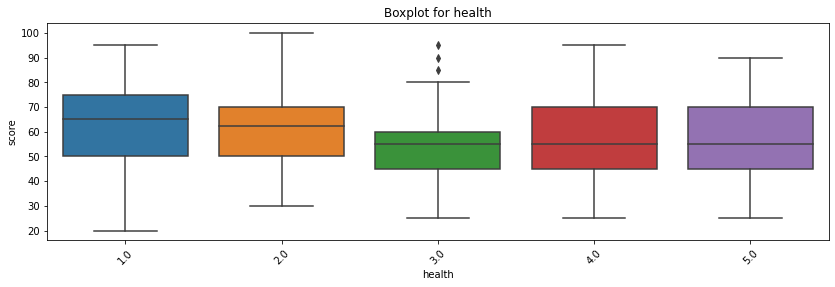

In [773]:
for col in list(stud_math_nom.columns):
    get_boxplot(col)

In [774]:
# Найдем статистические различия
for col in list(stud_math_nom.columns):
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Medu
Найдены статистически значимые различия для колонки Fedu
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки Fjob
Найдены статистически значимые различия для колонки studytime
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки schoolsup
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки goout


Оставим эти переменные в датасете

In [776]:
stud_math_model = stud_math.loc[:, ['age', 'absences', 'sex', 'address', 'Medu', 'Fedu',
                                    'Mjob', 'Fjob', 'studytime', 'failures', 'schoolsup', 'higher', 'goout']]
stud_math_model

,age,absences,sex,address,Medu,Fedu,Mjob,Fjob,studytime,failures,schoolsup,higher,goout
0,18,6.0,F,U,4.0,4.0,at_home,teacher,2.0,0.0,yes,yes,4.0
1,17,4.0,F,U,1.0,1.0,at_home,other,2.0,0.0,no,yes,3.0
2,15,10.0,F,U,1.0,1.0,at_home,other,2.0,3.0,yes,yes,2.0
3,15,2.0,F,U,4.0,2.0,health,NaN,3.0,0.0,no,yes,2.0
4,16,4.0,F,U,3.0,3.0,other,other,2.0,0.0,no,yes,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,NaN,M,U,2.0,2.0,services,services,2.0,2.0,no,yes,4.0
391,17,3.0,M,U,3.0,1.0,services,services,1.0,0.0,no,yes,5.0
392,21,3.0,M,R,1.0,1.0,other,other,1.0,3.0,NaN,NaN,3.0
393,18,0.0,M,R,3.0,2.0,services,other,1.0,0.0,no,yes,1.0


# Выводы

В данных немного пустых значений, выбросы присутствуют только в 4 столбцах(некоторые могут быть просто опечаткой), что может говорить что данные относительно чистые